In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [255]:
marathon_data = pd.read_csv('MarathonData.csv', encoding='utf-8')

In [256]:
marathon_data.head(3)

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A


## column description
id: 
simple counter

Marathon: 
the Marathon name where the data were extracted. I use the data coming out from Strava "Side by side comparison" and the data coming from the final marathon result

Name: 
The athlete's name, still some problems with UTF-8, I'll fix that soon

Category: 
the sex and age group of a runner - MAM Male Athletes under 40 years - WAM Women under 40 Years - M40 Male Athletes between 40 and 45 years

km4week 
This is the total number of kilometers run in the last 4 weeks before the marathon, marathon included. If, for example, the km4week is 100, the athlete has run 400 km in the four weeks before the marathon

sp4week 
This is the average speed of the athlete in the last 4 training weeks. The average counts all the kilometers done, included the slow kilometers done before and after the training. A typic running session can be of 2km of slow running, then 12-14km of fast running, and finally other 2km of slow running. The average of the speed is this number, and with time this is one of the numbers that has to be refined

cross training: 
If the runner is also a cyclist, or a triathlete, does it counts? Use this parameter to see if the athlete is also a cross trainer in other disciplines

Wall21: In decimal. The tricky field. To acknowledge a good performance, as a marathoner, I have to run the first half marathon with the same split of the second half. If, for example, I run the first half marathon in 1h30m, I must finish the marathon in 3h (for doing a good job). If I finish in 3h20m, I started too fast and I hit "the wall". My training history is, therefore, less valid, since I was not estimating my result

Marathon time: 
In decimal. This is the final result. Based on my training history, I must predict my expected Marathon time

Category: 
This is an ancillary field. It gives some direction, so feel free to use or discard it. It groups in: 
- A results under 3h 
- B results between 3h and 3h20m 
- C results between 3h20m and 3h40m 
- D results between 3h40 and 4h

### EDA start

In [257]:
marathon_data.describe()

,id,km4week,sp4week,MarathonTime
count,87.000000,87.000000,87.000000,87.000000
mean,44.000000,62.347126,139.840706,3.319080
std,25.258662,26.956019,1191.427864,0.376923
min,1.000000,17.900000,8.031414,2.370000
25%,22.500000,44.200000,11.498168,3.045000
50%,44.000000,58.800000,12.163424,3.320000
75%,65.500000,77.500000,12.854036,3.605000
max,87.000000,137.500000,11125.000000,3.980000


In [258]:
marathon_data['CrossTraining'] = marathon_data['CrossTraining'].fillna('Nothing')

In [259]:
marathon_data['Wall21'] = marathon_data['Wall21'].replace(' -   ', 0)

In [260]:
marathon_data['Wall21'] = marathon_data['Wall21'].apply(pd.to_numeric, errors='ignore')

In [261]:
marathon_data.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,87.000000,87.000000
mean,44.000000,62.347126,139.840706,1.518161,3.319080
std,25.258662,26.956019,1191.427864,0.462522,0.376923
min,1.000000,17.900000,8.031414,0.000000,2.370000
25%,22.500000,44.200000,11.498168,1.440000,3.045000
50%,44.000000,58.800000,12.163424,1.610000,3.320000
75%,65.500000,77.500000,12.854036,1.755000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


In [220]:
wall_max = np.max(marathon_data['Wall21'])

In [223]:
marathon_data['Wall21'] = marathon_data['Wall21'].apply(lambda x: wall_max - x)

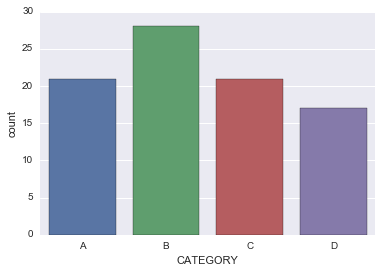

In [263]:
sns.countplot(marathon_data['CATEGORY'])

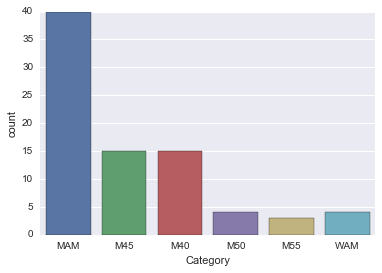

In [264]:
sns.countplot(marathon_data['Category'])

(array([  1.,   3.,   5.,  12.,   9.,  17.,   8.,  14.,   8.,  10.]),
 array([ 2.37 ,  2.531,  2.692,  2.853,  3.014,  3.175,  3.336,  3.497,
         3.658,  3.819,  3.98 ]),
 <a list of 10 Patch objects>)

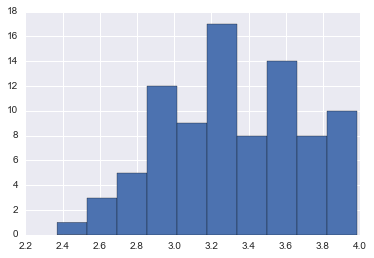

In [265]:
plt.hist(marathon_data['MarathonTime'])

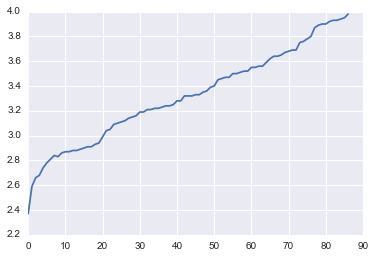

In [266]:
plt.plot(marathon_data['MarathonTime'])

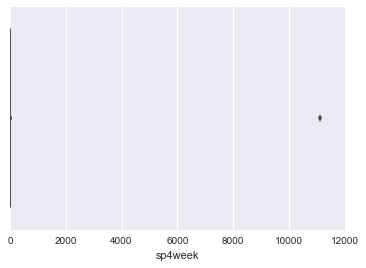

In [268]:
sns.boxplot(x=marathon_data['sp4week'])

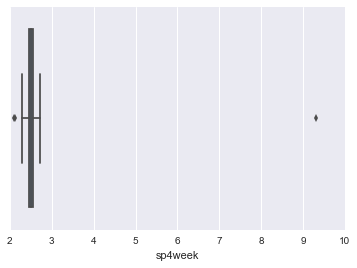

In [269]:
sns.boxplot(x=np.log(marathon_data['sp4week']))

In [270]:
marathon_data['sp4week'].skew()

9.3273646292756069

In [271]:
marathon_data['km4week'].skew()

0.74704874200582116

In [272]:
marathon_data['Wall21'].skew()

-2.3490531135670425

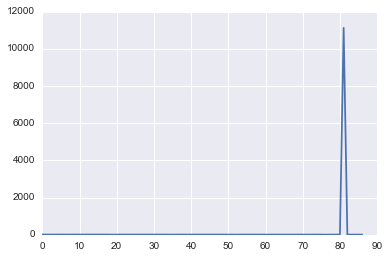

In [273]:
plt.plot(marathon_data['sp4week'])

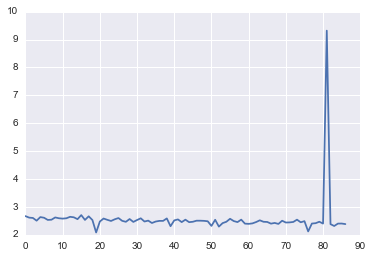

In [274]:
plt.plot(np.log(marathon_data['sp4week']))

In [232]:
np.max(marathon_data['sp4week'])

11125.0

In [233]:
marathon_data[marathon_data['sp4week'] == 11125]

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
81,82,Prague17,Nathan Khan,MAM,35.6,11125.0,Nothing,0.0,3.92,D


In [275]:
marathon_data['sp4week'].describe()

count       87.000000
mean       139.840706
std       1191.427864
min          8.031414
25%         11.498168
50%         12.163424
75%         12.854036
max      11125.000000
Name: sp4week, dtype: float64

In [277]:
marathon_data = marathon_data[marathon_data['sp4week'] != 11125]

In [278]:
marathon_data['sp4week'] = np.log(marathon_data['sp4week'])

### data group by CATEGORY 

In [279]:
df_mA = marathon_data[marathon_data['CATEGORY'] == 'A']
df_mB = marathon_data[marathon_data['CATEGORY'] == 'B']
df_mC = marathon_data[marathon_data['CATEGORY'] == 'C']
df_mD = marathon_data[marathon_data['CATEGORY'] == 'D']

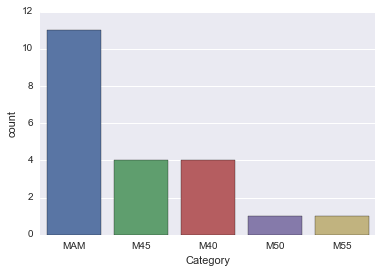

In [280]:
sns.countplot(df_mA['Category'])

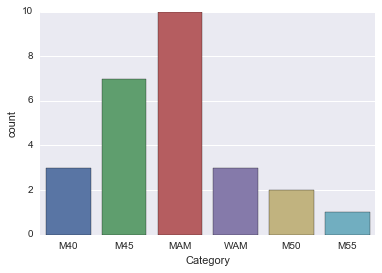

In [281]:
sns.countplot(df_mB['Category'])

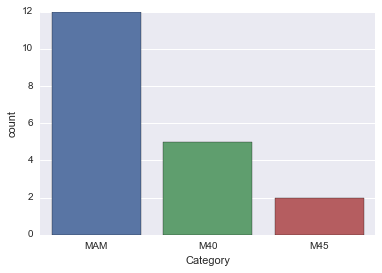

In [282]:
sns.countplot(df_mC['Category'])

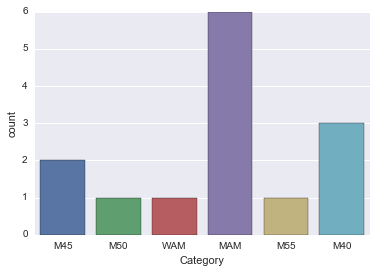

In [283]:
sns.countplot(df_mD['Category'])

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11cf0be0>,
 'caps': [<matplotlib.lines.Line2D at 0x11cfc748>,
 'fliers': [<matplotlib.lines.Line2D at 0x11d02f98>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11d02128>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11cf0dd8>,
  <matplotlib.lines.Line2D at 0x11d33f60>]}

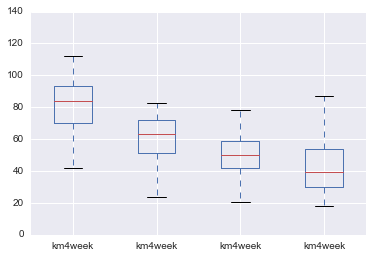

In [284]:
pd.concat([df_mA['km4week'], df_mB['km4week'], df_mC['km4week'], df_mD['km4week']], axis=1).boxplot()

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11db1be0>,
 'caps': [<matplotlib.lines.Line2D at 0x11dbd748>,
 'fliers': [<matplotlib.lines.Line2D at 0x11dc3f98>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11dc3128>,
 'whiskers': [<matplotlib.lines.Line2D at 0x11db1dd8>,
  <matplotlib.lines.Line2D at 0x11df5f60>]}

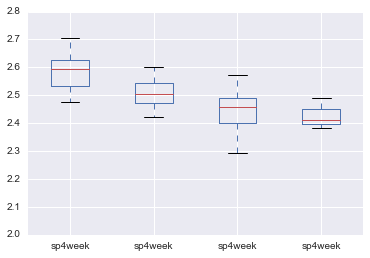

In [285]:
pd.concat([df_mA['sp4week'], df_mB['sp4week'], df_mC['sp4week'], df_mD['sp4week']], axis=1).boxplot()

### model - Linear Regression

In [286]:
m_df = marathon_data.drop(['CATEGORY', 'Category', 'CrossTraining', 'Marathon', 'Name', 'id'], axis=1)

In [287]:
m_df.head(2)

,km4week,sp4week,Wall21,MarathonTime
0,132.8,2.669641,1.16,2.37
1,68.6,2.615527,1.23,2.59


In [288]:
x_train= m_df.drop(['MarathonTime'],axis=1)
y_train= m_df['MarathonTime']

In [289]:
from sklearn.cross_validation import train_test_split

In [290]:
data_train, data_test, label_train, label_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [291]:
from sklearn.linear_model import LinearRegression

In [292]:
slr = LinearRegression()
slr.fit(data_train, label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [293]:
slr.score(data_test, label_test)

0.67267116275197458

I will upgrade this analysis. 